In [10]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = 128
BATCH_SIZE = 32

In [11]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
 r"C:\Users\madhu sah\Minor_project\dataset\train",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 6172 files belonging to 2 classes.


In [3]:
#train_ds = train.skip(6)

In [12]:
test_ds =  tf.keras.preprocessing.image_dataset_from_directory(
 r"C:\Users\madhu sah\Minor_project\dataset\test",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 1134 files belonging to 2 classes.


In [34]:
class_name = train_ds.class_names
class_name

['covid', 'normal']

In [13]:
 valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
 r"C:\Users\madhu sah\Minor_project\dataset\validation",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2090 files belonging to 2 classes.


In [6]:
#valid_ds = valid.skip(6)

In [14]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255)
])

In [7]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
layers.experimental.preprocessing.RandomRotation(0.2)
])

In [15]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,3)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation = 'sigmoid')
    
])
model.build(input_shape=input_shape)
#input_shape)

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (32, 128, 128, 3)         0         
_________________________________________________________________
sequential (Sequential)      (32, 128, 128, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 126, 126, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 63, 63, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 61, 61, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 30, 30, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 28, 28, 64)         

In [18]:
model.compile(
optimizer = 'adam',
 loss = 'binary_crossentropy',
 metrics=['accuracy']
)

In [19]:
history = model.fit(
   train_ds,
   epochs = 50,
    batch_size = BATCH_SIZE,
    verbose=1,
    validation_data = valid_ds

)

Epoch 1/30
193/193 [==============================] - 125s 642ms/step - loss: 0.6372 - accuracy: 0.6162 - val_loss: 0.5505 - val_accuracy: 0.7187
Epoch 2/30
193/193 [==============================] - 149s 767ms/step - loss: 0.5564 - accuracy: 0.6991 - val_loss: 0.4610 - val_accuracy: 0.7732
Epoch 3/30
193/193 [==============================] - 140s 722ms/step - loss: 0.5095 - accuracy: 0.7353 - val_loss: 0.4846 - val_accuracy: 0.7804
Epoch 4/30
193/193 [==============================] - 150s 774ms/step - loss: 0.4899 - accuracy: 0.7484 - val_loss: 0.5136 - val_accuracy: 0.7402
Epoch 5/30
193/193 [==============================] - 155s 803ms/step - loss: 0.4716 - accuracy: 0.7660 - val_loss: 0.4191 - val_accuracy: 0.8062
Epoch 6/30
193/193 [==============================] - 164s 849ms/step - loss: 0.4575 - accuracy: 0.7719 - val_loss: 0.4084 - val_accuracy: 0.8029
Epoch 7/30
193/193 [==============================] - 146s 754ms/step - loss: 0.4387 - accuracy: 0.7831 - val_loss: 0.3970 -

In [ ]:
scores_vgg = model_vgg.evaluate(test_ds)

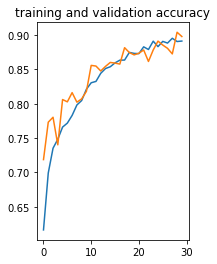

In [31]:
EPOCHS=30
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
loss = history.history['val_loss']
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training accuracy')
plt.plot(range(EPOCHS),val_acc,label='validation accuracy')
#plt.legand(loc = 'lower right')
plt.title('training and validation accuracy')
plt.show()

# RESNET50

In [20]:
 from tensorflow.keras.applications import ResNet50

In [21]:
res_class = ResNet50(weights = 'imagenet', include_top=False, input_shape=(128,128,3))
res_class.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [22]:
model_res = models.Sequential()
model_res.add(res_class)

In [32]:
model_res.add(layers.Flatten())
model_res.add(layers.Dense(512,activation='relu'))
model_res.add(layers.Dense(512,activation='relu'))
model_res.add(layers.Dense(1,activation = 'sigmoid'))

In [24]:
model_res.compile(
optimizer = 'adam',
 loss = 'binary_crossentropy',
 metrics=['accuracy']
)

In [25]:
res_history = model_res.fit(
     train_ds,
   epochs = 50,
    batch_size = BATCH_SIZE,
    verbose=1,
    validation_data = valid_ds
 )

Epoch 1/10
193/193 [==============================] - 1249s 6s/step - loss: 0.5596 - accuracy: 0.8731 - val_loss: 58.2471 - val_accuracy: 0.3770
Epoch 2/10
193/193 [==============================] - 1261s 7s/step - loss: 0.1701 - accuracy: 0.9418 - val_loss: 0.3751 - val_accuracy: 0.9325
Epoch 3/10
193/193 [==============================] - 1282s 7s/step - loss: 0.1093 - accuracy: 0.9611 - val_loss: 0.5202 - val_accuracy: 0.8957
Epoch 4/10
193/193 [==============================] - 1205s 6s/step - loss: 0.0743 - accuracy: 0.9725 - val_loss: 0.5822 - val_accuracy: 0.8024
Epoch 5/10
193/193 [==============================] - 1205s 6s/step - loss: 0.0611 - accuracy: 0.9780 - val_loss: 0.4311 - val_accuracy: 0.9043
Epoch 6/10
193/193 [==============================] - 1196s 6s/step - loss: 0.0580 - accuracy: 0.9822 - val_loss: 0.2208 - val_accuracy: 0.9120
Epoch 7/10
193/193 [==============================] - 1366s 7s/step - loss: 0.0515 - accuracy: 0.9820 - val_loss: 0.1672 - val_accuracy

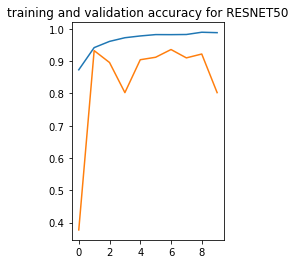

In [28]:
EPOCHS=10
res_acc=res_history.history['accuracy']
res_loss=res_history.history['loss']
res_val_acc=res_history.history['val_accuracy']
res_val_loss=res_history.history['val_loss']
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),res_acc,label='Training accuracy')
plt.plot(range(EPOCHS),res_val_acc,label='validation accuracy ')
plt.title('training and validation accuracy for RESNET50')
plt.show()

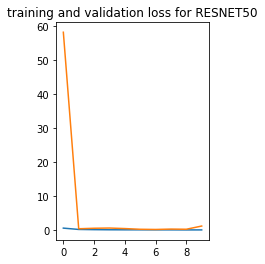

In [29]:
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),res_loss,label='Training loss')
plt.plot(range(EPOCHS),res_val_loss,label='validation loss')
plt.title('training and validation loss for RESNET50')
plt.show()

In [36]:
scores = model_res.evaluate(test_ds)

36/36 [==============================] - 25s 682ms/step - loss: 1.3474 - accuracy: 0.8122


first predict image
actual label: normal
covid
[0.9869565]


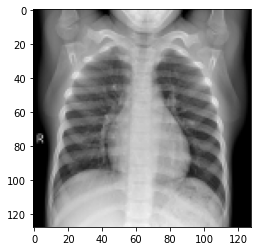

In [35]:
for image_batch, labels_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first predict image")
    plt.imshow(first_image)
    print("actual label:", class_name[first_label])
    batch_prediction = model.predict(image_batch)
    if(batch_prediction[0]>0.5):
        print("covid")
    else:
        print("normal")
    print(batch_prediction[0] )

# VGG 19 transfer learning model

In [37]:
from tensorflow.keras.applications import VGG19

In [38]:
con_class = VGG19(weights = 'imagenet', include_top=False, input_shape=(128,128,3))

In [39]:
model_vgg = models.Sequential()
model_vgg.add(con_class)

model_vgg.add(layers.Flatten())
model_vgg.add(layers.Dense(128,activation = 'relu'))
model_vgg.add(layers.Dense(1,activation = 'sigmoid'))

In [40]:
model_vgg.compile(
optimizer = 'adam',
loss='binary_crossentropy',
metrics=['acc']
)

In [ ]:
vgg_history = model_vgg.fit(
     train_ds,
     epochs = 10,
     batch_size = BATCH_SIZE,
     verbose=1,
     validation_data = valid_ds
 )

Epoch 1/10
193/193 [==============================] - 3408s 18s/step - loss: 35.9282 - acc: 0.5680 - val_loss: 0.6493 - val_acc: 0.6507
Epoch 2/10
193/193 [==============================] - 3630s 19s/step - loss: 0.6864 - acc: 0.5875 - val_loss: 0.6156 - val_acc: 0.6579
Epoch 3/10
 55/193 [=======>......................] - ETA: 39:39 - loss: 0.6463 - acc: 0.6364

In [ ]:
for image_batch, labels_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first predict image")
    plt.imshow(first_image)
    print("actual label:", class_name[first_label])
    batch_prediction = model.predict(image_batch)
    if(batch_prediction[0]>0.5):
        print("covid")
    else:
        print("normal")
    print(batch_prediction[0] )

In [36]:
scores_vgg = model_vgg.evaluate(test_ds)

36/36 [==============================] - 4s 108ms/step - loss: 0.2571 - accuracy: 0.9101


In [37]:
scores

[0.25705647468566895, 0.9100528955459595]

In [38]:
history_vgg.params

{'verbose': 1, 'epochs': 30, 'steps': 193}

In [39]:
history_vgg.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

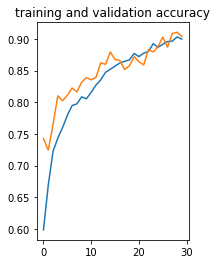

In [42]:
EPOCHS=30
vgg_acc = vgg_history.history['accuracy']
vgg_loss = vgg_history.history['loss']
vgg_val_acc = vgg_history.history['val_accuracy']
val_loss = history.history['val_loss']
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training accuracy')
plt.plot(range(EPOCHS),val_acc,label='validation accuracy')
#plt.legand(loc = 'lower right')
plt.title('training and validation accuracy')
plt.show()

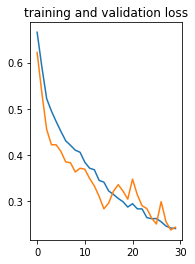

In [43]:
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),vgg_loss,label='Training loss')
plt.plot(range(EPOCHS),vgg_val_loss,label='validation loss')
plt.title('training and validation loss')
plt.show()

first predict image
actual label: normal
covid
[0.9987524]


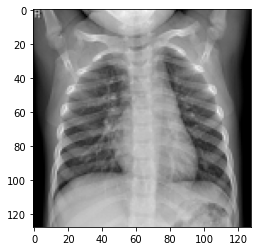

In [45]:
for image_batch, labels_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first predict image")
    plt.imshow(first_image)
    print("actual label:", class_name[first_label])
    batch_prediction = model.predict(image_batch)
    if(batch_prediction[0]>0.5):
        print("covid")
    else:
        print("normal")
           
    print(batch_prediction[0] )
    #break;
   # print(class_name[np.argmax(batch_prediction[0])])

In [46]:
def predict(model,img):
    img_arr = tf.keras.preprocessing.image.img_to_array(img)
    img_arr = tf.expand_dims(img_arr,0)#create a batch
    prediction = model_res.predict(img_arr)
    if(prediction[0]<0.5):
        predicted_class = class_name[0]
    else:
        predicted_class = class_name[1]
    confidence = 100*prediction[0]
    return predicted_class,confidence
    

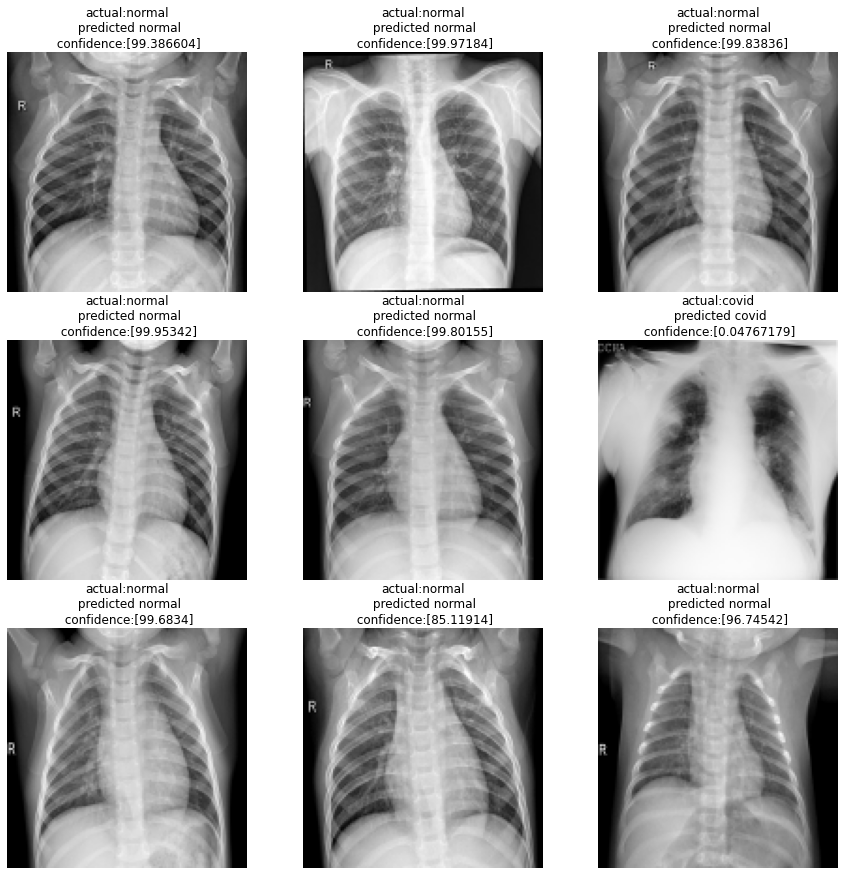

In [55]:
plt.figure(figsize = (15,15))
for images, labels in test_ds.take(2):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model,images[i].numpy())
        actual_class = class_name[labels[i]]
        plt.title(f"actual:{actual_class}\n predicted {predicted_class}\n confidence:{confidence}")
        plt.axis("off")


In [49]:
# import os
# os.listdir(f"..\models")

In [52]:
model_version=4
model.save(f"C:\Code\Potato\models{model_version}")

INFO:tensorflow:Assets written to: C:\Code\Potato\models4\assets
